# Introduction to Programming with Python

# Unit 4: Loops

Our task of generating a problem book with quadratic equations will only be useful, if we can generate many equations of the same type, not just one. Computer is very good at repeating the same computations, so the ability for us to express the idea of repeating something over and over is very important. This concept is called **a loop**.

The best way to create a loop is by using **for** operator: 

In [1]:
for color in ["red","green","blue"]:
    print("Roses are "+color)

Roses are red
Roses are green
Roses are blue


In this example, we have a list of colors (written in square brackets `[]`), and **for loop** repeats the `print` operator several times, one time for each color in the list. In the code block below **for**, variable `color` takes the value of each color in turn.

Very often we want to repeat something several times. In order for us not to write a list, we can use the special function `range(n)` to specify the range of number from 0 to the given number. For example, to print all the numbers from 1 to 10, we can write: 

In [2]:
for i in range(10):
    print(i+1, end=' ')

1 2 3 4 5 6 7 8 9 10 

Notice two things here:
* We print `i+1` and not `i`, because `i` changes from 0 to 9. It is important to remember that in Python numbering starts with 0.
* We use `end=' '` construction to indicate what `print` shoud do after printing the specified value. By default `print` goes to the new line, and by specifying space as an end-characted we can print all numbers in one line 

## Drawing a Street

Remember that we defined functon to draw a house earlier? Let's now explore our notion of loops and draw a street of houses! But first of all, let's also simplify our function of drawing a square using for loop:

In [1]:
import jturtle as turtle

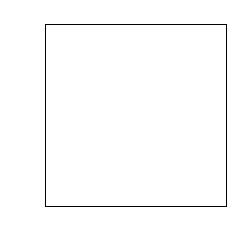

In [2]:
def square(x):
    for t in range(4):
        turtle.forward(x)
        turtle.right(90)
        
square(10)
turtle.done()

Now the function to draw the house itself. We will add a few more lines to the end of the function in order to return the turtle to the original position in the lower left corner of the drawing:

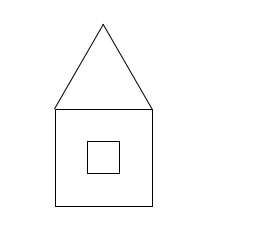

In [6]:
def house(size):
    square(size)
    turtle.forward(size)
    turtle.right(30)
    turtle.forward(size)
    turtle.right(120)
    turtle.forward(size)
    turtle.right(30)

    turtle.penup()
    turtle.forward(2*size/3)
    turtle.right(90)
    turtle.forward(size/3)
    turtle.pendown()

    square(size/3)
    turtle.penup()
    turtle.forward(2*size/3)
    turtle.left(90)
    turtle.forward(size/3)
    turtle.left(180)
    turtle.pendown()

house(10)
turtle.done()

To draw 5 houses in a street, we basically need to call the `house` function 5 times in a loop. However, if we just do that, all houses will be rendered on top of each other, and we will not actually see them. 

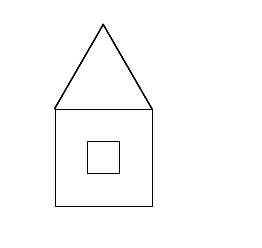

In [7]:
for i in range(5):
    house(10)
turtle.done()

To draw all houses in a row, we need to add some code to move the turtle in between houses, i.e. to shift to the right each time:

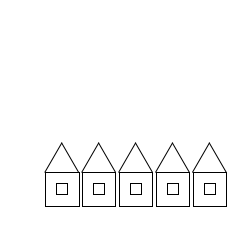

In [8]:
for i in range(5):
    house(10)
    turtle.penup()
    turtle.right(90)
    turtle.forward(11)
    turtle.left(90)
    turtle.pendown()
turtle.done()

Congratulations, now you have mastered the **for**-loop! However, let us have a little bit more practice with loops.

## Creating a Problem Book

Not that we know loops, we can easily produce a problem book with many different problems. In order not to duplicate functions defined in previous modules here, we collected them into an external module, and just write the `import` statement here to use them. If you have doubts how a function is defined - you can either have a look into the previous module, or into [pycourse.py](pycourse.py) file that contains all definitions.

In [9]:
import random,math
from IPython.display import display, Math

from pycourse import coef, equation, solve

def random_equation():
    a = random.randint(1,5)*random.choice([-1,1])
    b = random.randint(-10,10)
    c = random.randint(-20,20)
    return (a,b,c)

def print_random_equation():
    a,b,c = random_equation()
    if solve(a,b,c) == None:
        display(Math(equation(a,b,c)+"\quad (\mbox{no solutions})"))
    else:
        x1,x2 = solve(a,b,c)
        display(Math(equation(a,b,c)+f"\quad (x_1={x1:.2f},x_2={x2:.2f})"))

This code mostly duplicates the code from last unit, but there are a couple of new things here as well. First of all, there are weird things what we print out, such as `\quad` and `\mbox`. Do not worry about them, those are used to make equations look a bit better. They are not part of Python language, but rather they are used inside Azure Notebooks to render math formulae.

Second new feature is that we can see here is called **string interpolation** and **formatting**. Often we have the situation when we need to print the value of some varible `x` inside the string, for example:

In [10]:
x = 10/3 # Suppose I have spent 2/3 of my daily pocket money of $10
print('I have',x,'dollars left')

I have 3.3333333333333335 dollars left


If I want for some reason to store the whole message in a variable to print it later, I would need to put in some manual type conversion, like this:

In [11]:
message = 'I have '+str(x)+' dollars left.'
print(message)

I have 3.3333333333333335 dollars left.


The same effect can be accomplished using special Python syntax for string interpolation:

In [12]:
message = f'I have {x} dollars left'
print(message)

I have 3.3333333333333335 dollars left


String interpolation starts with `f'`, and any variable or expression that appears inside curly braces `{..}` will be substituted by its value.

One more thing that can be used with interpolation is **formatting**. You may have noticed that in our case the number `3.333333` does not look nice. It would be better to round it up to, say, 2 decimal places. While we can achieve it with `math.round` function, we can also specify **format** for printing the number, i.e. how many decimal places we want:

In [13]:
print(f'I have {x:0.2f} dollars left')

I have 3.33 dollars left


Now that we have explained all interesting places in the code, let's use `print_random_equation` function to generate a number or random equations!

In [14]:
for i in range(10):
    print_random_equation()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This concludes our module. Please complete some exercises before going to the next one!

## Exercise: Factorial

A factorial of number $n$ (denoted by $n!$) a number that is obtained by multiplying all natural numbers from $1$ to $n$, i.e.
$$n! = 1\cdot2\cdot3\cdot\dots\cdot n$$
You need to:
1. Write a function `fact` that will calculate the factorial of any number `n`
2. Print a table of factorals for $n$ from 1 to 7